In [1]:
import torch
from segment_anything import sam_model_registry

# DEVICE = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
DEVICE = torch.device('cpu')
MODEL_TYPE = "vit_b"
CHECKPOINT_PATH='sam_vit_b_01ec64.pth'

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [3]:
import cv2

IMAGE_PATH= 'pins@high.jpg'
image= cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

In [32]:
output_mask = mask_generator.generate(image_rgb)


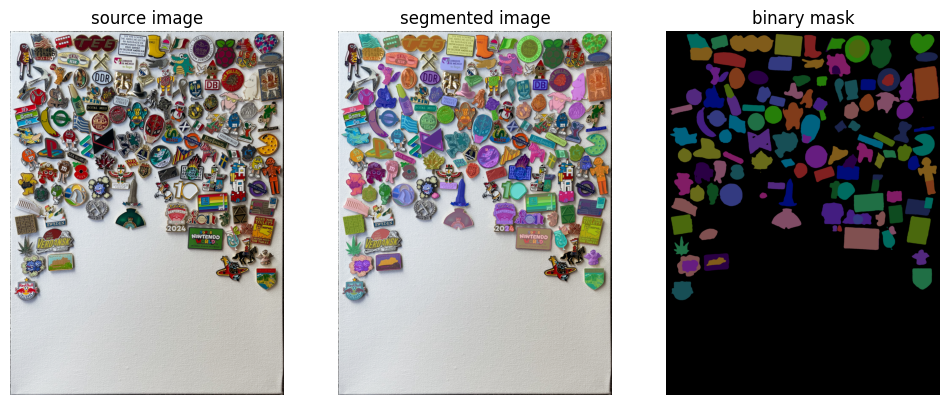

In [34]:
view_masks(image, output_mask)

In [25]:
# Work on half the image

image_half_rgb = image_rgb[:image_rgb.shape[0] // 2, :image_rgb.shape[1] // 2]
image_half = image[:image.shape[0] // 2, :image.shape[1] // 2]



In [26]:
output_mask = mask_generator.generate(image_half_rgb)

In [30]:
import numpy as np
import supervision as sv

def view_masks(source, masks):
    """"
    Display the source image, the segmented image and the binary mask

    :param source: The source image in BGR format
    :param masks: The result of the automatic mask generator call
    """
    mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
    detections = sv.Detections.from_sam(sam_result=masks)
    dark = np.zeros_like(source)
    annotated_image = mask_annotator.annotate(scene=source.copy(), detections=detections)
    masked = mask_annotator.annotate(scene=dark, detections=detections)

    sv.plot_images_grid(
        images=[source, annotated_image, masked],
        grid_size=(1, 3),
        titles=['source image', 'segmented image', 'binary mask'])

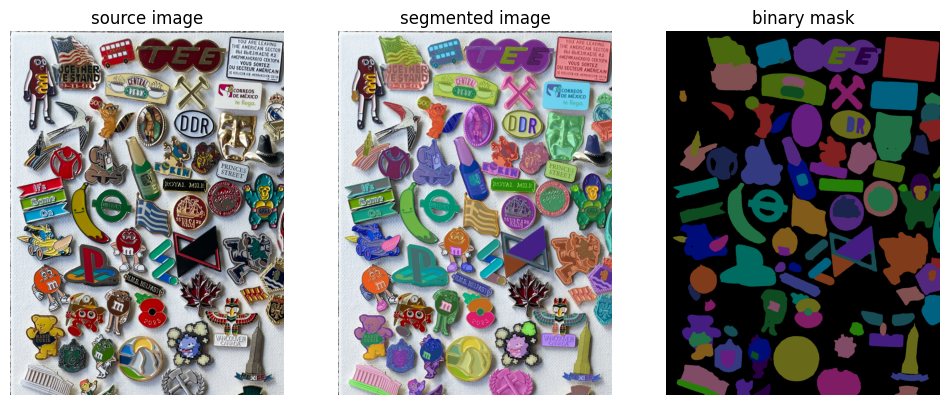

In [31]:
view_masks(image_half, output_mask)